In [7]:
# https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%A8%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D1%82%D1%8C%D0%B5%D0%B2%D0%BE,_%D0%B8%D0%BC._%D0%90._%D0%A1._%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD%D0%B0_(%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82)

In [102]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pyramid.arima import auto_arima
from pandas.plotting import autocorrelation_plot

ModuleNotFoundError: No module named 'pyramid'

In [9]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'README.md',
 'Интенсив_анализ_данных_Борнева.pptx',
 'Погода 1.ipynb']

In [10]:
data_msk = pd.read_excel('data/Мск_5лет.xls', skiprows=6)
data_msk = data_msk.rename(columns={'Местное время в Москве (ВДНХ)': 'Time'})
data_msk.index = pd.to_datetime(data_msk['Time'], format='%d.%m.%Y %H:%M')

data_spb = pd.read_excel('data/СПб_5лет.xls', skiprows=6)
data_spb = data_spb.rename(columns={'Местное время в Санкт-Петербурге': 'Time'})
data_spb.index = pd.to_datetime(data_spb['Time'], format='%d.%m.%Y %H:%M')

data_vell = pd.read_excel('data/Вэллингтон.xls', skiprows=6)
data_vell = data_vell.rename(columns={'Местное время в Веллингтоне (аэропорт)': 'Time'})
data_vell.index = pd.to_datetime(data_vell['Time'], format='%d.%m.%Y %H:%M')

In [133]:
msk_day = data_msk[data_msk.index.hour == 12][::-1]

In [134]:
# msk_day['T'].plot()
plt.figure(figsize=(20, 5))
plt.plot(msk_day['T'], linewidth=1)
plt.xticks(msk_day.index)

([<matplotlib.axis.XTick at 0x2399250eb48>,
  ...],
 <a list of 1826 Text xticklabel objects>)

Error in callback <function flush_figures at 0x0000023980916D38> (for post_execute):


KeyboardInterrupt: 

In [138]:
msk_day['T'].describe()

count    1826.000000
mean        8.772837
std        10.986743
min       -26.900000
25%         0.400000
50%         8.050000
75%        18.500000
max        31.700000
Name: T, dtype: float64

([<matplotlib.axis.XTick at 0x23995ad0f88>,
 <a list of 175 Text xticklabel objects>)

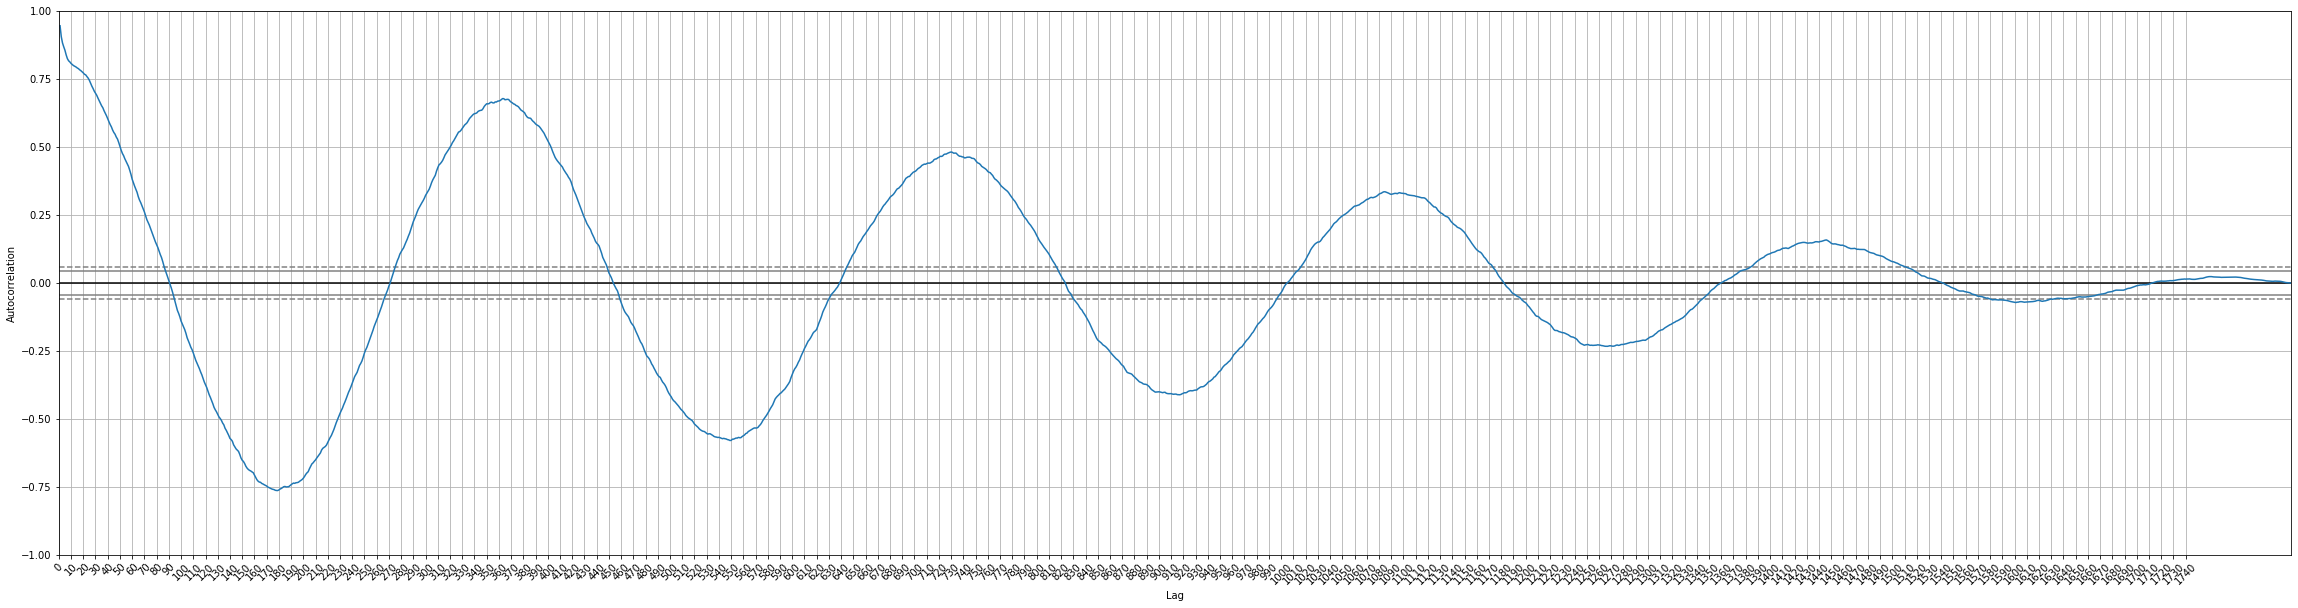

In [174]:
plt.figure(figsize=(40, 10))
autocorrelation_plot(msk_day['T'])
plt.xticks(range(1750)[::10], rotation=45)

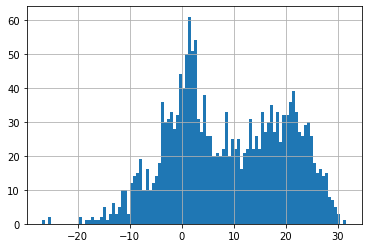

In [140]:
msk_day['T'].hist(bins=100)

In [141]:
decomposition = seasonal_decompose(msk_hours['T'], freq=1)

In [142]:
msk_day.index

DatetimeIndex(['2015-01-01 12:00:00', '2015-01-02 12:00:00',
               '2015-01-03 12:00:00', '2015-01-04 12:00:00',
               '2015-01-05 12:00:00', '2015-01-06 12:00:00',
               '2015-01-07 12:00:00', '2015-01-08 12:00:00',
               '2015-01-09 12:00:00', '2015-01-10 12:00:00',
               ...
               '2019-12-23 12:00:00', '2019-12-24 12:00:00',
               '2019-12-25 12:00:00', '2019-12-26 12:00:00',
               '2019-12-27 12:00:00', '2019-12-28 12:00:00',
               '2019-12-29 12:00:00', '2019-12-30 12:00:00',
               '2019-12-31 12:00:00', '2020-01-01 12:00:00'],
              dtype='datetime64[ns]', name='Time', length=1826, freq=None)

In [83]:
len(msk_day)

1826

C:\Users\Nastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Nastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Nastasia\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


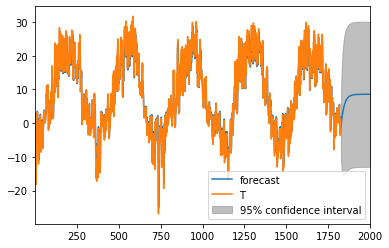

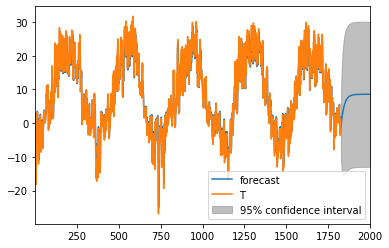

In [143]:
mod = ARMA(msk_day['T'], order=(1, 0))
res = mod.fit(disp=0)
# fig, ax = plt.subplots()
# ax = msk_day['T'].plot(ax=ax)
res.plot_predict(start = 1, end=2000)

In [ ]:
msk_day.sort_values(ascending=False)

In [39]:
day_change = msk_hours['T'].pct_change()  #.sort_values(ascending=False)
day_change[day_change < np.inf].sort_values(ascending=False)

Time
2016-12-17 12:00:00    66.0
2015-11-21 12:00:00    27.0
2019-10-31 12:00:00    25.0
2019-01-14 12:00:00    21.0
2018-11-20 12:00:00    18.5
                       ... 
2016-12-30 12:00:00   -20.0
2017-04-14 12:00:00   -25.0
2016-11-10 12:00:00   -31.0
2017-12-08 12:00:00   -40.0
2017-10-26 12:00:00    -inf
Name: T, Length: 1818, dtype: float64

In [41]:
day_change = msk_hours['T'].diff()
day_change.sort_values(ascending=False)

Time
2018-04-21 12:00:00    16.1
2018-09-22 12:00:00    15.0
2016-05-11 12:00:00    14.8
2017-01-05 12:00:00    14.4
2015-04-29 12:00:00    14.3
                       ... 
2017-01-09 12:00:00   -11.2
2017-04-28 12:00:00   -11.7
2018-05-01 12:00:00   -11.7
2017-05-28 12:00:00   -13.4
2020-01-01 12:00:00     NaN
Name: T, Length: 1826, dtype: float64

In [27]:
decomposition

TypeError: 'DecomposeResult' object is not subscriptable

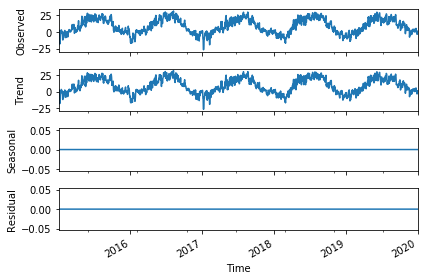

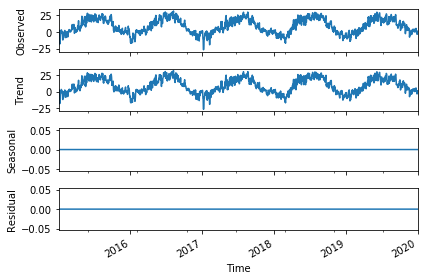

In [25]:
decomposition.plot()

In [ ]:
'это строка' "Это тоже"

In [75]:
print('bes\t')

bes	


In [66]:
all_data = pd.DataFrame()
all_data['Moscow'] = data_msk['T']
all_data['S. Petersburg'] = data_spb['T']
all_data['Vellington'] = data_vell['T']

In [68]:
all_data.corr()

,Moscow,S. Petersburg,Vellington
Moscow,1.000000,0.916477,-0.559160
S. Petersburg,0.916477,1.000000,-0.583254
Vellington,-0.559160,-0.583254,1.000000


<Figure size 1080x720 with 0 Axes>

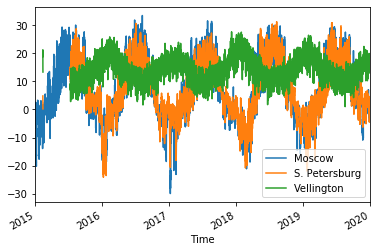

In [72]:
plt.figure(figsize=(15, 10))
all_data.plot()

In [49]:
len(data_msk), len(data_spb), len(data_vell)

(17647, 14607, 14489)

In [50]:
data_msk = data_msk[data_msk.index.hour == 12]
data_novosib = data_novosib[data_novosib.index.hour == 13]
data_spb = data_spb[data_spb.index.hour == 12]
data_vell = data_vell[data_vell.index.hour==12]

In [51]:
len(data_vell), len(data_msk), len(data_spb)

(1808, 1826, 1826)

In [53]:
set(data_msk.index) - set(data_vell.index)

{Timestamp('2015-05-20 12:00:00'),
 Timestamp('2015-05-21 12:00:00'),
 Timestamp('2015-05-22 12:00:00'),
 Timestamp('2015-05-23 12:00:00'),
 Timestamp('2015-05-24 12:00:00'),
 Timestamp('2015-05-25 12:00:00'),
 Timestamp('2015-05-26 12:00:00'),
 Timestamp('2015-05-27 12:00:00'),
 Timestamp('2015-07-23 12:00:00'),
 Timestamp('2017-08-04 12:00:00'),
 Timestamp('2017-10-11 12:00:00'),
 Timestamp('2017-10-12 12:00:00'),
 Timestamp('2018-04-22 12:00:00'),
 Timestamp('2018-07-13 12:00:00'),
 Timestamp('2019-02-16 12:00:00'),
 Timestamp('2019-02-17 12:00:00'),
 Timestamp('2019-02-18 12:00:00'),
 Timestamp('2019-07-01 12:00:00'),
 Timestamp('2019-07-25 12:00:00')}

In [47]:
data_spb.index.hour

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Местное время в Санкт-Петербурге', length=1826)

In [ ]:
data = pd.read_excel('ar2.xls', skiprows=6)
data = data.set_index('Местное время в Москве (центр, Балчуг)')
plt.figure(figsize=(10, 8))
data['sss'].fillna(0).unique()

In [ ]:
data.loc[data['sss'] == 'Менее 0.5', 'sss'] = 0
data.loc[data['sss'] == 'Снежный покров не постоянный.', 'sss'] = 0

In [ ]:
data['sss'].fillna(0).unique()

In [ ]:
data[~data['sss'].isna()]

In [ ]:
data['sss'].plot()
plt.xticks(rotation=45) 

In [ ]:
data[data['T'].isna()]

In [ ]:
data['T'].mean(), data['T'].max(), data['T'].min()

In [ ]:
plt.plot(data.index[::100], data['VV'][::100])

In [ ]:
data[['T', 'VV']].corr()

In [ ]:
data.columns

In [ ]:
data.describe

In [77]:
import time
time.time.now()

AttributeError: 'builtin_function_or_method' object has no attribute 'now'

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
data = msk_day.copy()
data['month'] = data.index.month
data['day'] = data.index.day
data_train = data[data.index.year < 2019]
data_test = data[data.index.year >= 2019].copy()

In [159]:
model = DecisionTreeRegressor(max_leaf_nodes=7)
model.fit(data_train[['month', 'day']], data_train['T'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [160]:
data_test['pred'] = model.predict(data_test[['month', 'day']])

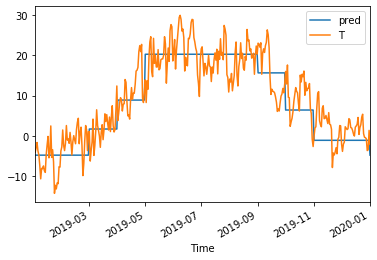

In [161]:
data_test['pred'].plot()
data_test['T'].plot()
plt.legend()

In [162]:
import statsmodels.api as sm

In [163]:
len(data_train)

1461

In [ ]:
mod = sm.tsa.statespace.SARIMAX(data_train['T'],
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred = results.get_prediction(start=1462, end=1600) #, dynamic=False)
pred_ci = pred.conf_int()
ax = msk_day['T'].plot(label='observed')
pred.predicted_mean.plot()  #ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()